<a href="https://colab.research.google.com/github/Mukolwe29/KCB-Data-science-and-AI/blob/master/time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("rugarch")
install.packages("lmtest")
install.packages("forecast")
install.packages("fGarch")
install.packages("urca")




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rugarch)
library(lmtest)
library(forecast)
library(fGarch)
library(urca)


In [ ]:
data <- read.csv("MCOILWTICO.csv")

tail(data)
head(data)

,DATE,MCOILWTICO
,<chr>,<dbl>
236,2023-08-01,81.39
237,2023-09-01,89.43
238,2023-10-01,85.64
239,2023-11-01,77.69
240,2023-12-01,71.90
241,2024-01-01,74.15


,DATE,MCOILWTICO
,<chr>,<dbl>
1,2004-01-01,34.31
2,2004-02-01,34.69
3,2004-03-01,36.74
4,2004-04-01,36.75
5,2004-05-01,40.28
6,2004-06-01,38.03


In [ ]:
ts_data<-ts(data[,2], start = c(2004,1), end = c(2024,1), frequency = 12)


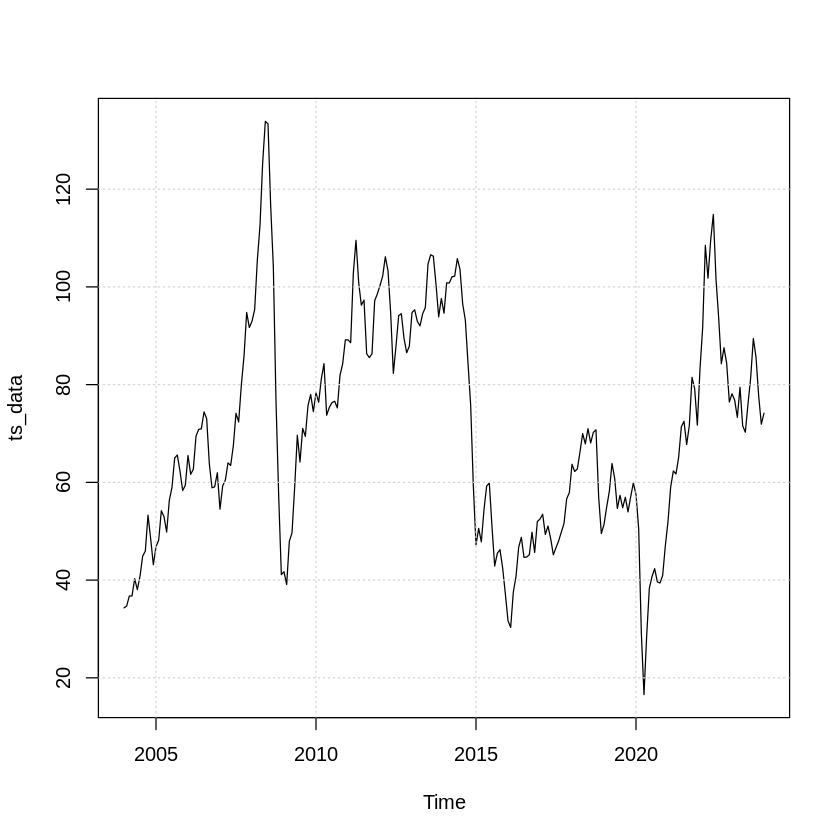

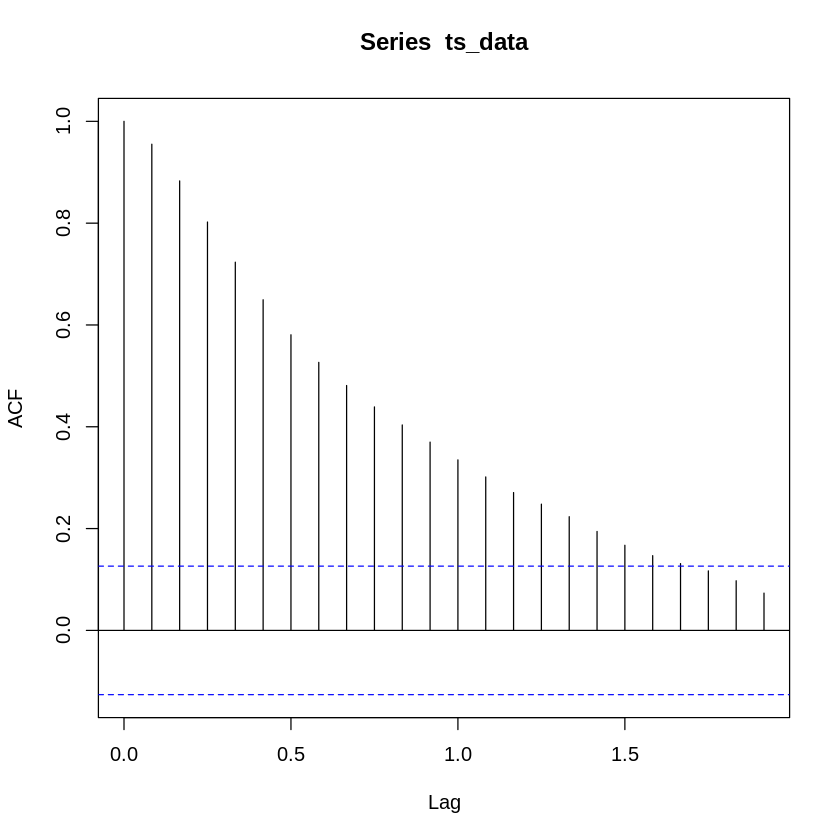

In [ ]:
plot(ts_data)
grid()
acf(ts_data)


In [ ]:
summary(ur.df(ts_data, type = "drift", selectlags = "AIC"))




############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.9878  -3.8927  -0.0636   3.9745  15.4573 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.18120    1.24879   3.348 0.000947 ***
z.lag.1     -0.05803    0.01698  -3.417 0.000746 ***
z.diff.lag   0.37040    0.06010   6.163 3.05e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.792 on 236 degrees of freedom
Multiple R-squared:  0.1607,	Adjusted R-squared:  0.1536 
F-statistic:  22.6 on 2 and 236 DF,  p-value: 1.05e-09


Value of test-statistic is: -3.417 5.8815 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [ ]:
dl_data<-diff(log(ts_data))

In [ ]:
summary(ur.df(dl_data, type = "drift", selectlags = "AIC"))



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51561 -0.05484  0.00070  0.05899  0.65300 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.002416   0.006733   0.359    0.720    
z.lag.1     -0.810893   0.077959 -10.401   <2e-16 ***
z.diff.lag   0.118879   0.064844   1.833    0.068 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1038 on 235 degrees of freedom
Multiple R-squared:  0.3716,	Adjusted R-squared:  0.3663 
F-statistic: 69.48 on 2 and 235 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.4015 54.0961 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


 the test statistic value is -10.4015, and it is compared against the critical values. Since the absolute value of the test statistic exceeds the critical values at the 1% significance level, the null hypothesis of a unit root (non-stationarity) is rejected. This suggests that the differenced and logged time series dl_data is likely stationary. This inference is further supported by the p-value, which is extremely small (< 2.2e-16), indicating strong evidence against the null hypothesis.

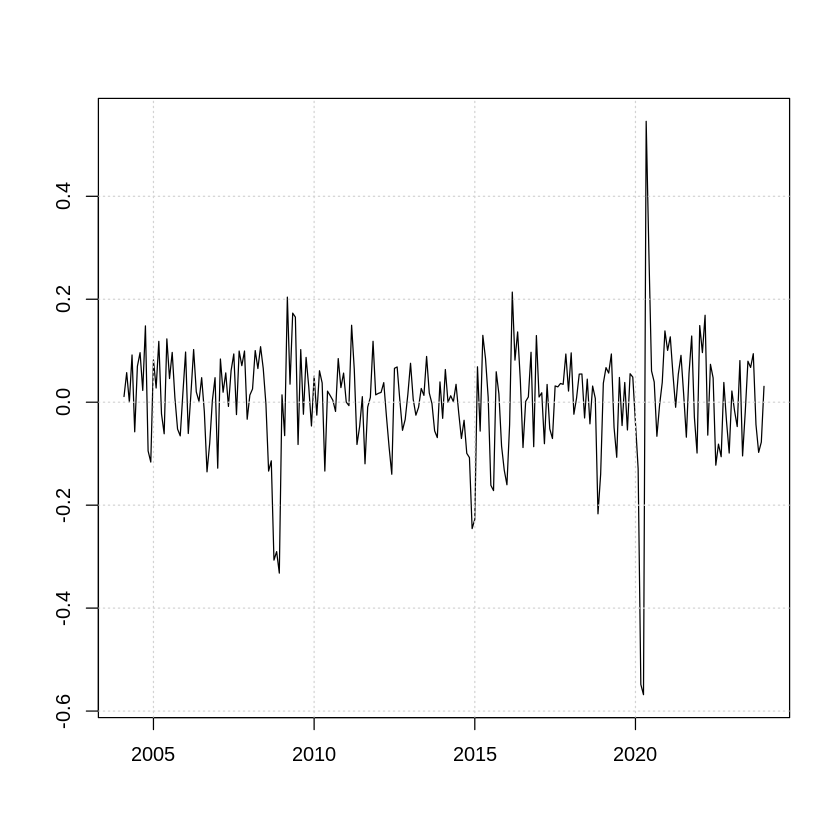

In [ ]:
plot(dl_data, ylab="", xlab="")
grid()


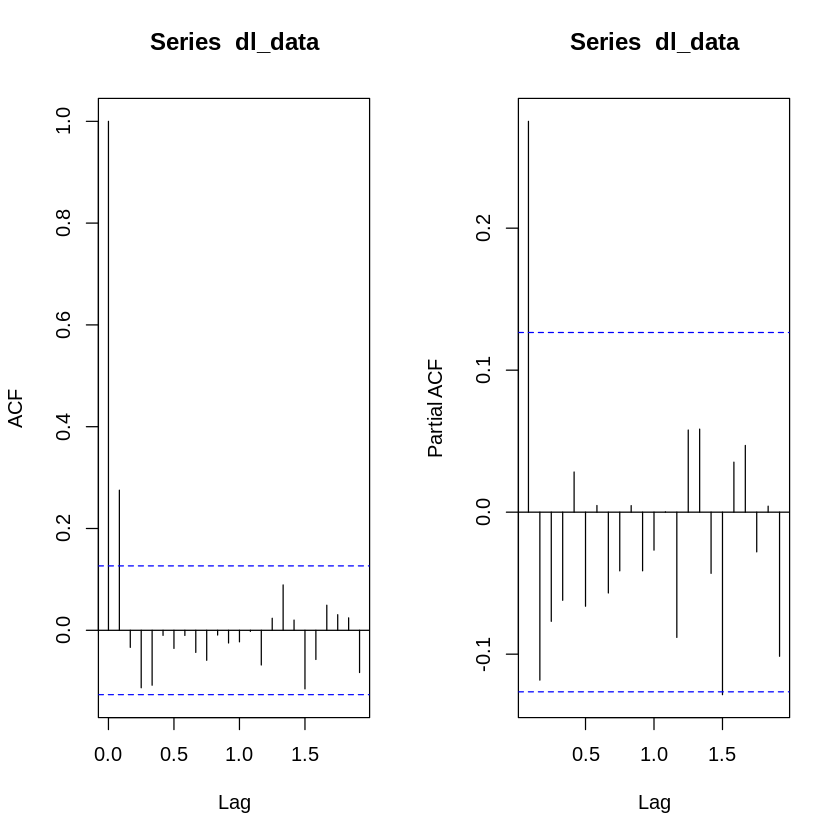

In [ ]:
par(mfrow = c(1, 2))
acf(dl_data)
pacf(dl_data)



In [ ]:
par(mfrow = c(1, 1))
ar1<-arima(dl_data, c(1,0,0))
ar1



Call:
arima(x = dl_data, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2741     0.0032
s.e.  0.0619     0.0092

sigma^2 estimated as 0.01071:  log likelihood = 203.8,  aic = -401.6


Call:
arima(x = dl_data, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2741     0.0032
s.e.  0.0619     0.0092

sigma^2 estimated as 0.01071:  log likelihood = 203.8,  aic = -401.6

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set 7.648841e-06 0.1034923 0.07215256 76.92842 224.4176 0.8079069
                   ACF1
Training set 0.03371766


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1       0.2740731  0.0618968  4.4279 9.515e-06 ***
intercept 0.0032422  0.0091884  0.3529    0.7242    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


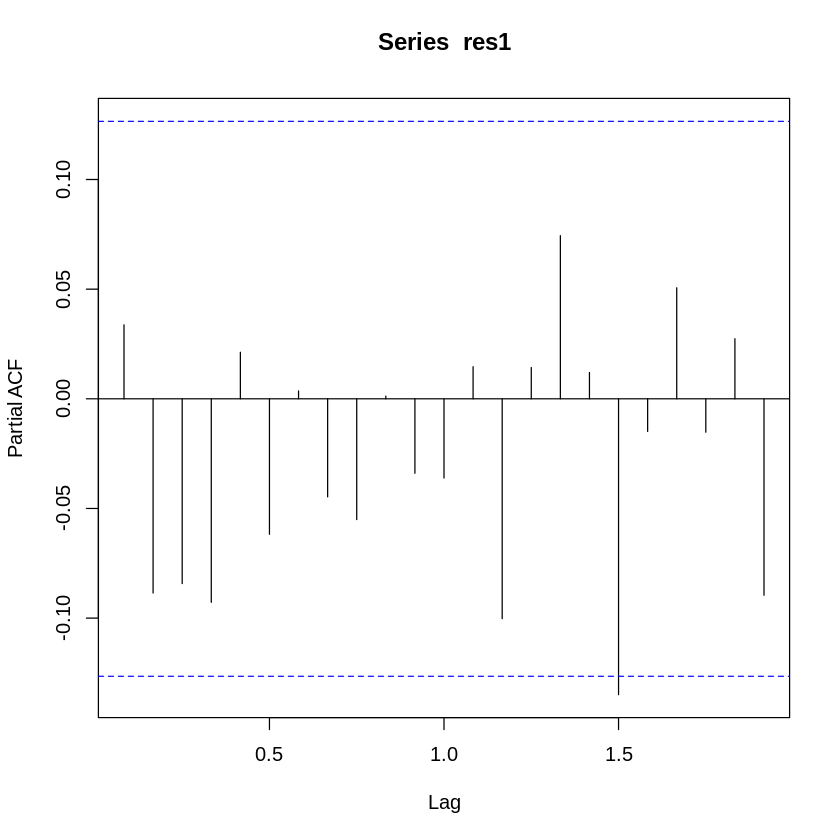

In [ ]:
summary(ar1)
res1 <- residuals(ar1)
pacf(res1)
coeftest(ar1)




Call:
arima(x = dl_data, order = c(2, 0, 0))

Coefficients:
         ar1     ar2  intercept
      0.3069  -0.118     0.0033
s.e.  0.0640   0.064     0.0082

sigma^2 estimated as 0.01056:  log likelihood = 205.49,  aic = -402.98


Call:
arima(x = dl_data, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2741     0.0032
s.e.  0.0619     0.0092

sigma^2 estimated as 0.01071:  log likelihood = 203.8,  aic = -401.6

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set 7.648841e-06 0.1034923 0.07215256 76.92842 224.4176 0.8079069
                   ACF1
Training set 0.03371766


z test of coefficients:

            Estimate Std. Error z value Pr(>|z|)    
ar1        0.3068879  0.0639913  4.7958 1.62e-06 ***
ar2       -0.1180279  0.0639672 -1.8451  0.06502 .  
intercept  0.0032624  0.0081748  0.3991  0.68984    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


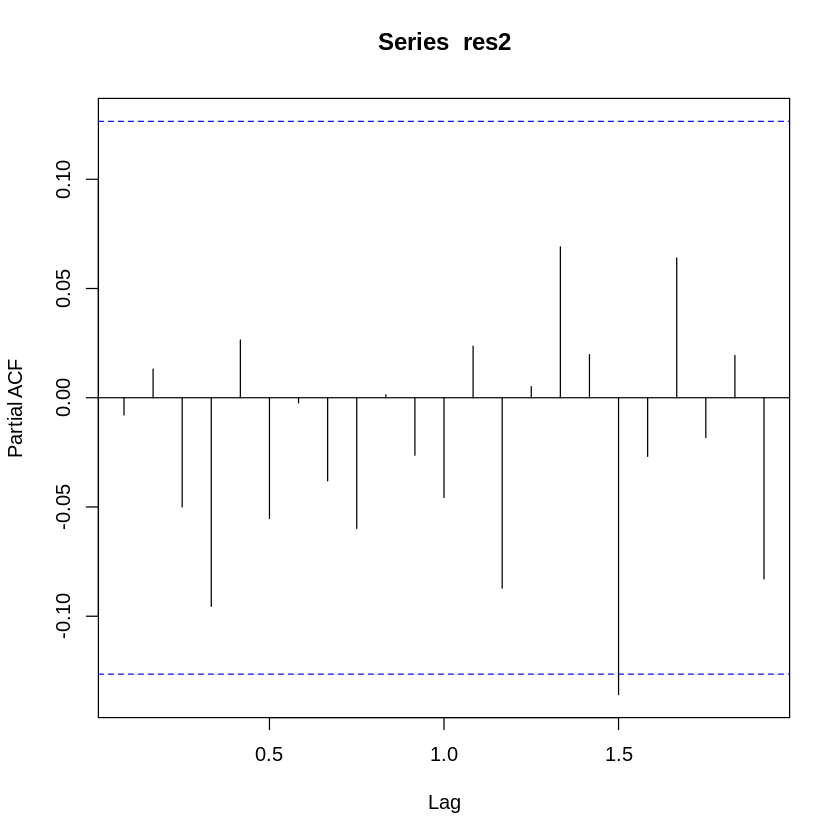

In [ ]:
ar2<-arima(dl_data, c(2,0,0))
ar2
summary(ar1)
res2 <- residuals(ar2)
pacf(res2)
coeftest(ar2)



Call:
arima(x = dl_data, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.3013     0.0032
s.e.  0.0610     0.0086

sigma^2 estimated as 0.01061:  log likelihood = 204.93,  aic = -403.86


Call:
arima(x = dl_data, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.3013     0.0032
s.e.  0.0610     0.0086

sigma^2 estimated as 0.01061:  log likelihood = 204.93,  aic = -403.86

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set 1.830256e-05 0.1030019 0.07217113 83.16054 240.3024 0.8081148
                    ACF1
Training set 0.002694159


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ma1       0.3012569  0.0609871  4.9397 7.825e-07 ***
intercept 0.0032418  0.0086436  0.3750    0.7076    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


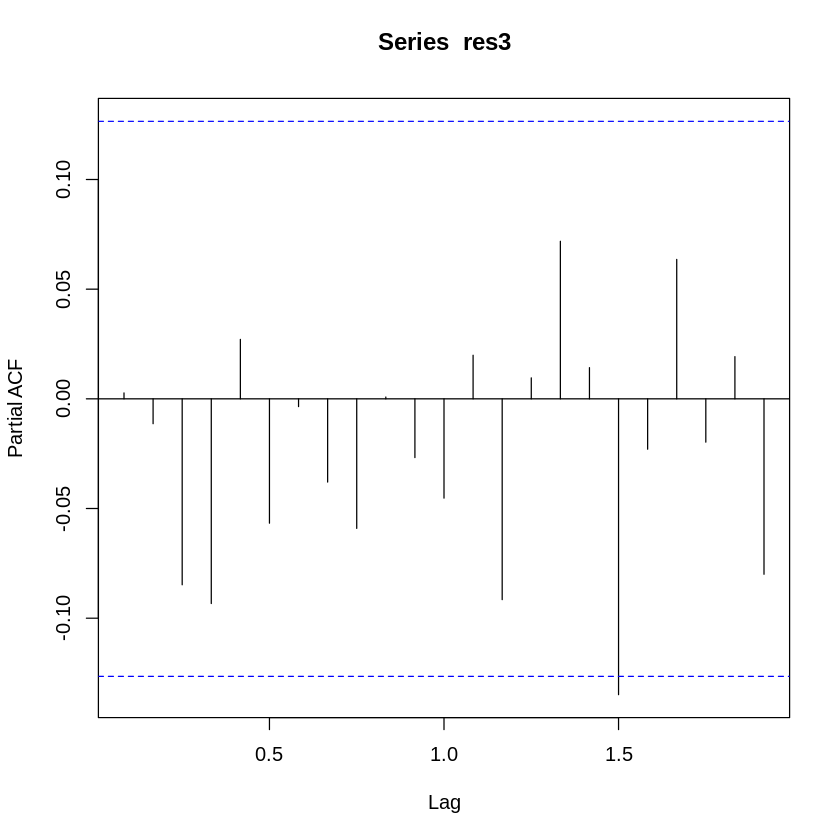

In [ ]:
ma1<-arima(dl_data, c(0,0,1))
ma1
summary(ma1)
res3 <- residuals(ma1)
pacf(res3)
coeftest(ma1)

In [ ]:
ar1$aic
ar2$aic
ma1$aic

[1] -401.5955

[1] -402.9756

[1] -403.8582

         Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
Feb 2024    0.010798823 -0.1218318 0.1434295 -0.1920423 0.2136399
Mar 2024    0.005313255 -0.1322086 0.1428351 -0.2050082 0.2156347
Apr 2024    0.003809809 -0.1340724 0.1416920 -0.2070629 0.2146825
May 2024    0.003397754 -0.1345115 0.1413070 -0.2075163 0.2143118
Jun 2024    0.003284821 -0.1346265 0.1411961 -0.2076323 0.2142019
Jul 2024    0.003253870 -0.1346576 0.1411653 -0.2076635 0.2141712
Aug 2024    0.003245386 -0.1346661 0.1411568 -0.2076720 0.2141628
Sep 2024    0.003243061 -0.1346684 0.1411545 -0.2076743 0.2141604
Oct 2024    0.003242424 -0.1346690 0.1411539 -0.2076750 0.2141598
Nov 2024    0.003242250 -0.1346692 0.1411537 -0.2076751 0.2141596
Dec 2024    0.003242202 -0.1346693 0.1411537 -0.2076752 0.2141596
Jan 2025    0.003242189 -0.1346693 0.1411536 -0.2076752 0.2141596

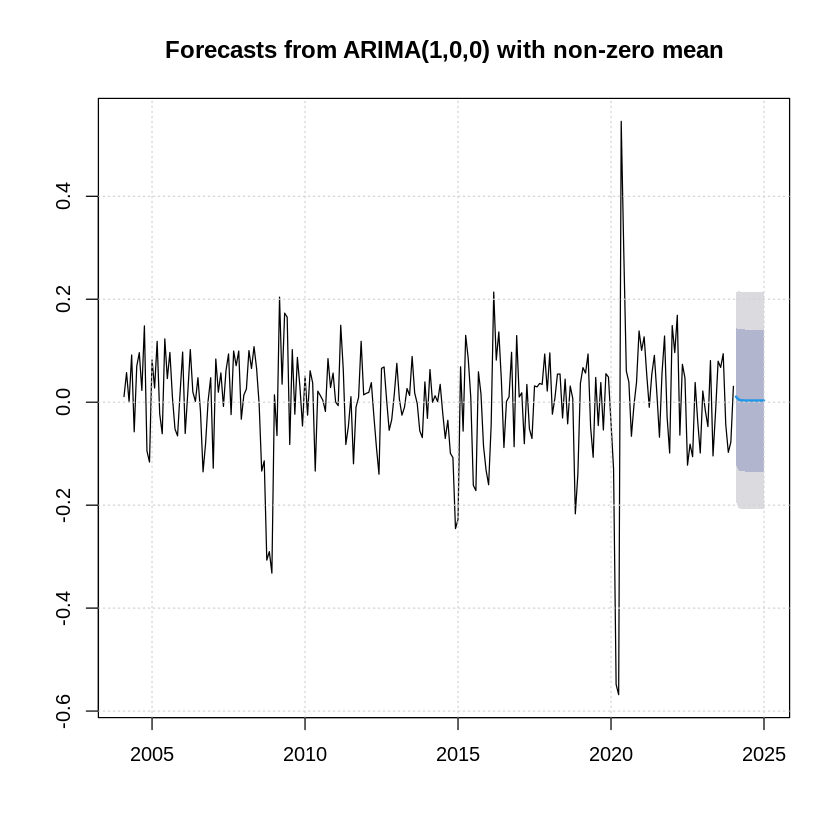

In [ ]:
forecast <- forecast(ar1, h=12)
plot(forecast)
grid()
forecast


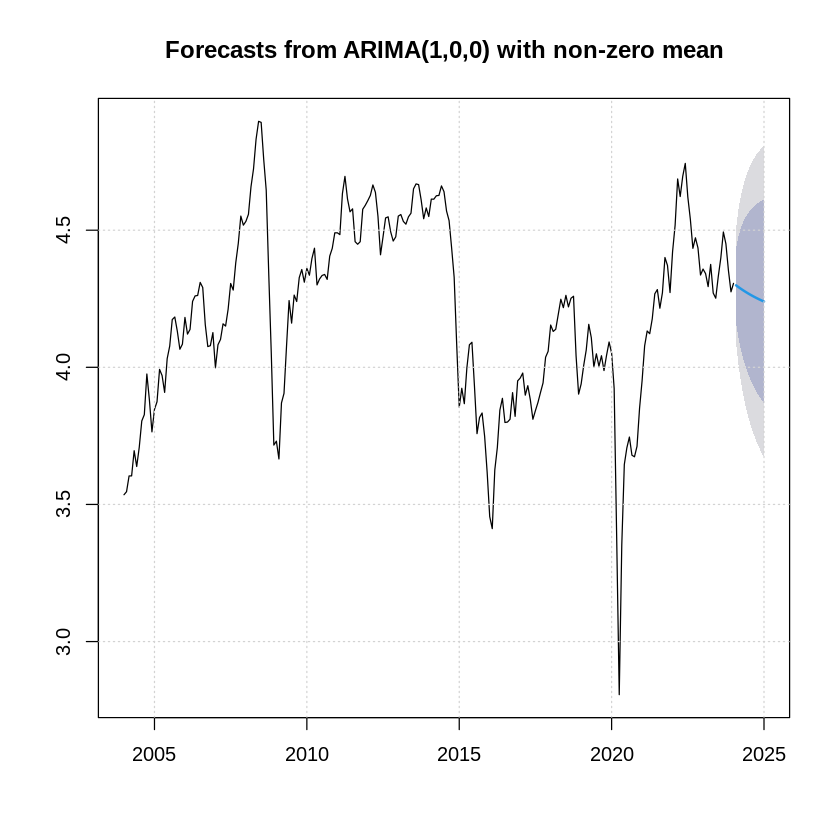

In [ ]:
ar1_su_log <- arima(log(ts_data), c(1,0,0))
forecast <- forecast(ar1_su_log, h=12)
plot(forecast)
grid()


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 21.538, df = 23, p-value = 0.5483

Model df: 1.   Total lags used: 24



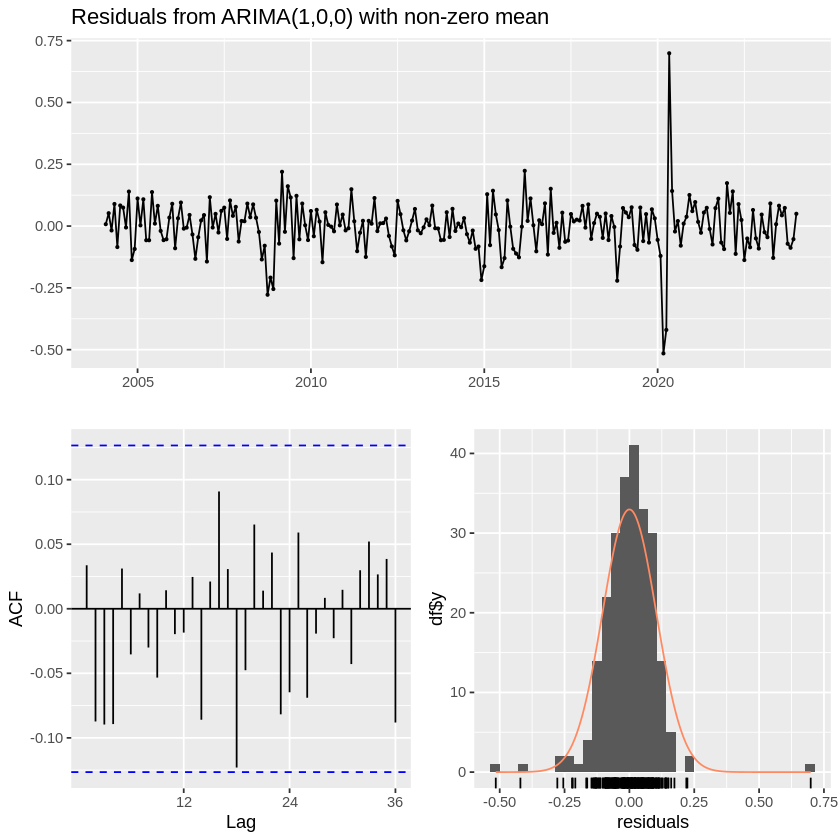


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 38.516, df = 23, p-value = 0.02241

Model df: 1.   Total lags used: 24



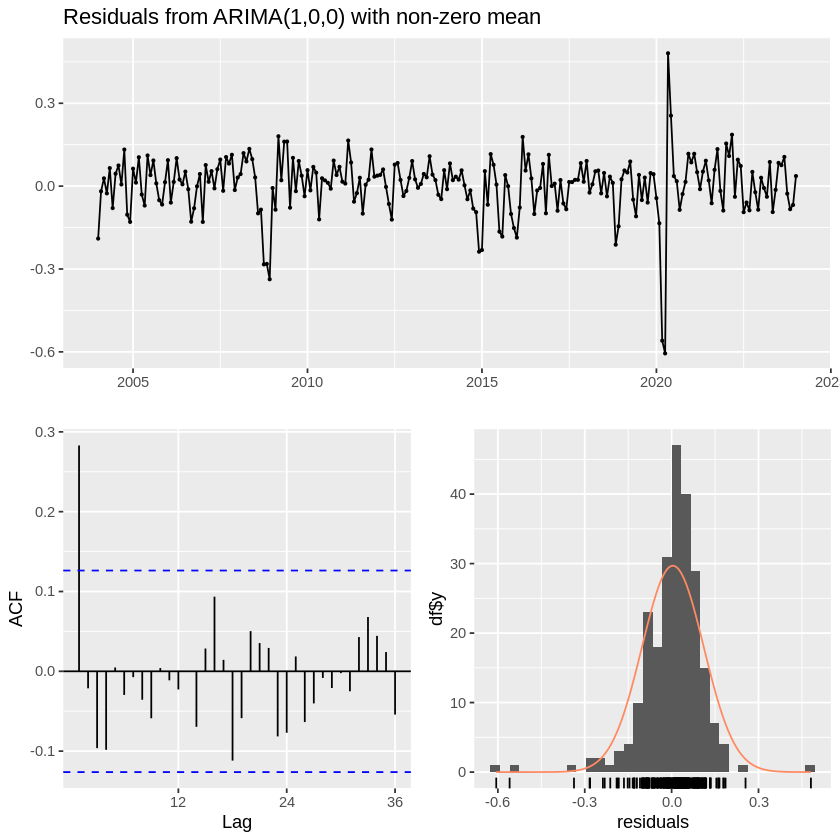

In [ ]:
checkresiduals(ar1)
checkresiduals(ar1_su_log)

In [ ]:
# GARCH(1,0)
spec.garch10 <- ugarchspec(variance.model = list(model = "sGARCH",
                                                 garchOrder = c(1,0)),
                           mean.model = list(armaOrder=c(1,0)))
garchModel10 <- ugarchfit(spec.garch10, data=dl_data)
garchModel10



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,0)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.016752    0.005856   2.8607 0.004227
ar1     0.106764    0.079041   1.3507 0.176780
omega   0.005053    0.000657   7.6862 0.000000
alpha1  0.467917    0.118281   3.9560 0.000076

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.016752    0.006100   2.7463 0.006027
ar1     0.106764    0.067428   1.5834 0.113338
omega   0.005053    0.000741   6.8231 0.000000
alpha1  0.467917    0.215771   2.1686 0.030114

LogLikelihood : 242.6178 

Information Criteria
------------------------------------
                    
Akaike       -1.9885
Bayes        -1.9305
Shibata      -1.9890
Hannan-Quinn -1.9651

Weig

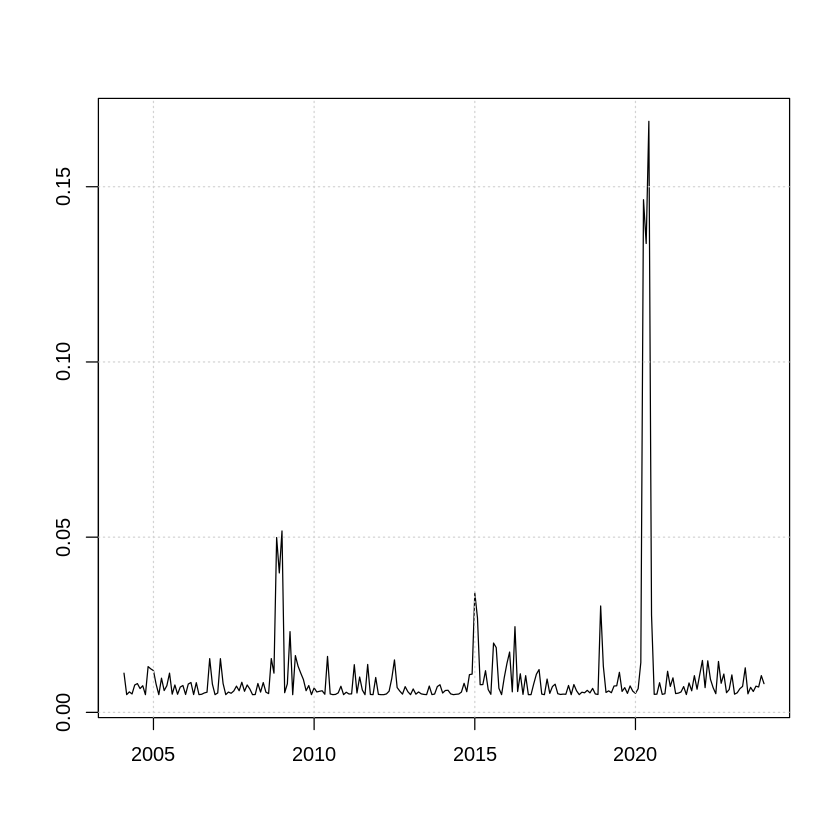

In [ ]:
vol_garch10 <- ts(garchModel10@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_garch10, xlab="", ylab="")
grid()



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.015105    0.006088   2.4813 0.013092
ar1     0.126806    0.079557   1.5939 0.110958
omega   0.003772    0.001516   2.4883 0.012836
alpha1  0.437997    0.118476   3.6969 0.000218
beta1   0.173681    0.208326   0.8337 0.404450

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.015105    0.007429  2.03330 0.042023
ar1     0.126806    0.086073  1.47324 0.140687
omega   0.003772    0.002965  1.27204 0.203359
alpha1  0.437997    0.257913  1.69823 0.089463
beta1   0.173681    0.440356  0.39441 0.693277

LogLikelihood : 242.982 

Information Criteria
------------------------------------
                 

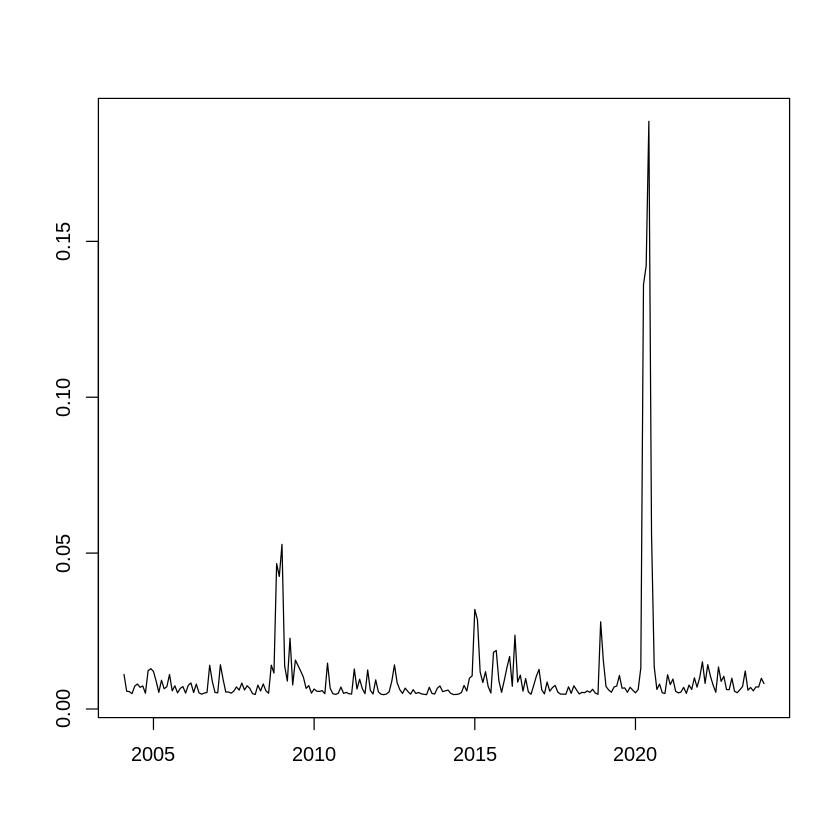

In [ ]:
# GARCH(1,1)
spec.garch11 <- ugarchspec(variance.model = list(model = "sGARCH",
                                                 garchOrder = c(1,1)),
                           mean.model = list(armaOrder=c(1,0)))
garchModel11 <- ugarchfit(spec.garch11, data=dl_data)
garchModel11

vol_garch11 <- ts(garchModel11@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_garch11, xlab="", ylab="")


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.004084    0.010813  0.37773 0.705633
ar1     0.199523    0.111290  1.79282 0.073002
omega  -1.573072    0.533225 -2.95011 0.003177
alpha1 -0.325837    0.076154 -4.27863 0.000019
beta1   0.679475    0.107225  6.33688 0.000000
gamma1  0.321348    0.141913  2.26441 0.023549

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.004084     0.02053  0.19895 0.842304
ar1     0.199523     0.21707  0.91918 0.358001
omega  -1.573072     0.57663 -2.72807 0.006371
alpha1 -0.325837     0.13108 -2.48576 0.012927
beta1   0.679475     0.11557  5.87937 0.000000
gamma1  0.321348     0.23673  1.35746 0.174636

LogLike

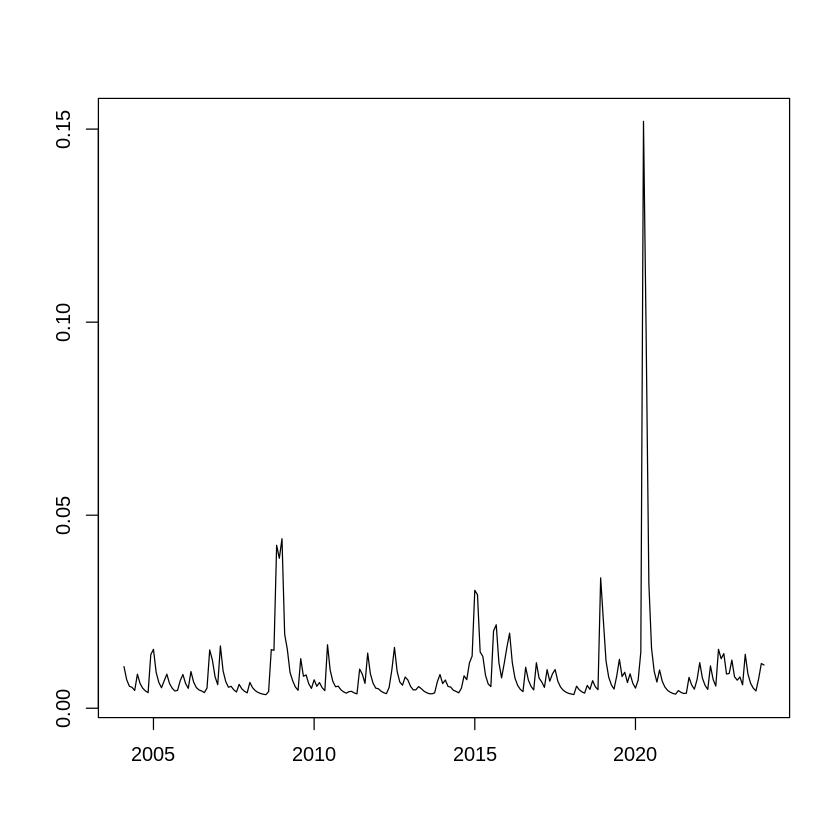

In [ ]:
# EGARCH(1,1)
spec.egarch11 <- ugarchspec(variance.model = list(model = "eGARCH",
                                                  garchOrder = c(1,1)),
                            mean.model = list(armaOrder=c(1,0)))
eGarchModel11 <- ugarchfit(spec.egarch11, data=dl_data)
eGarchModel11

vol_egarch11 <- ts(eGarchModel11@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_egarch11, xlab="", ylab="")


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,0)
fGARCH Sub-Model	: TGARCH
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.010154    0.006770   1.4998 0.133668
ar1     0.191990    0.059934   3.2034 0.001358
omega   0.066737    0.004546  14.6812 0.000000
alpha1  0.303507    0.059138   5.1321 0.000000
eta11   0.867478    0.144256   6.0135 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.010154    0.006781   1.4975 0.134273
ar1     0.191990    0.053532   3.5865 0.000335
omega   0.066737    0.004845  13.7747 0.000000
alpha1  0.303507    0.099566   3.0483 0.002301
eta11   0.867478    0.116691   7.4339 0.000000

LogLikelihood : 251.7501 

Information Criteria
---------------------------

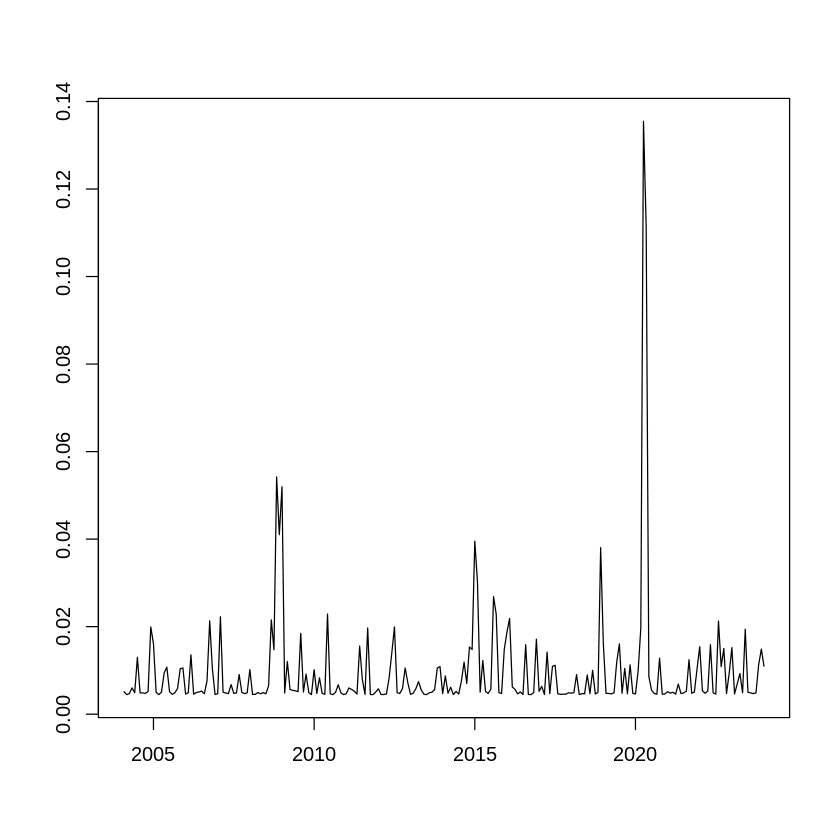

In [ ]:
# TGARCH(1,0)
spec.tgarch10 <- ugarchspec(
  variance.model = list(model = "fGARCH",
                        submodel = "TGARCH",
                        garchOrder = c(1,0)
  ),
  mean.model = list(armaOrder=c(1,0))
)

tGarchModel10 <- ugarchfit(spec.tgarch10, data=dl_data)
tGarchModel10

vol_tgarch10 <- ts(tGarchModel10@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_tgarch10, xlab="", ylab="")

In [ ]:
# TGARCH(1,1)
spec.tgarch11 <- ugarchspec(
  variance.model = list(model = "fGARCH",
                        submodel = "TGARCH",
                        garchOrder = c(1,1)
  ),
  mean.model = list(armaOrder=c(1,0))
)

tGarchModel11 <- ugarchfit(spec.tgarch11, data=dl_data)
tGarchModel11



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: TGARCH
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.007861    0.007384  1.06464 0.287039
ar1     0.204551    0.067731  3.02006 0.002527
omega   0.055353    0.014075  3.93273 0.000084
alpha1  0.251070    0.082192  3.05468 0.002253
beta1   0.169344    0.202524  0.83617 0.403061
eta11   1.000000    0.284601  3.51369 0.000442

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.007861    0.007848  1.00163 0.316520
ar1     0.204551    0.069207  2.95565 0.003120
omega   0.055353    0.015544  3.56105 0.000369
alpha1  0.251070    0.121240  2.07085 0.038372
beta1   0.169344    0.238186  0.71097 0.477101
eta11   1.000000    0.312501 

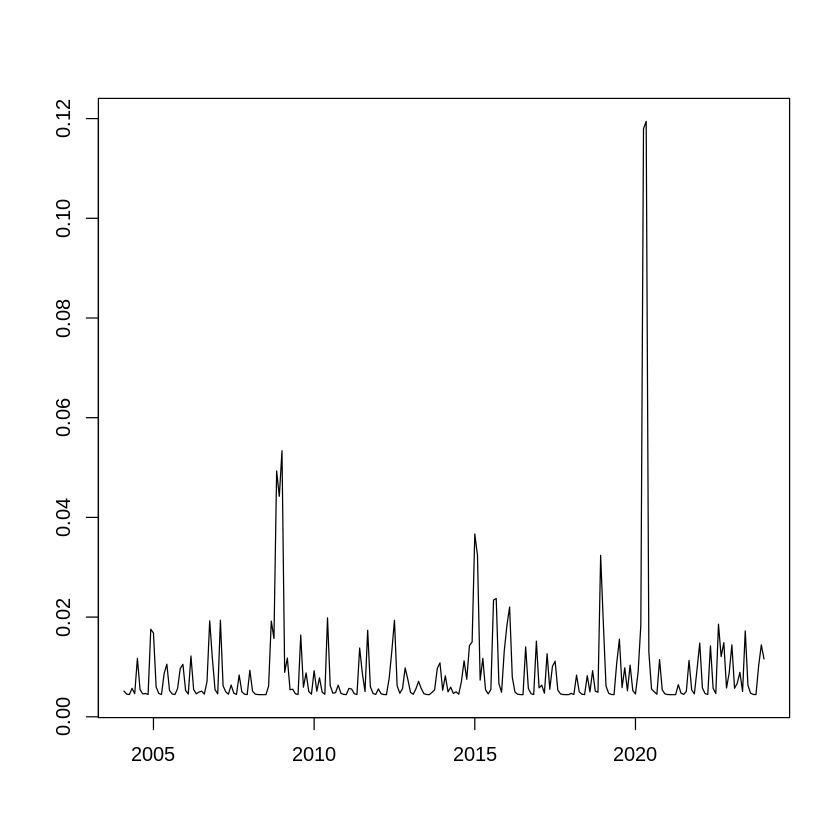

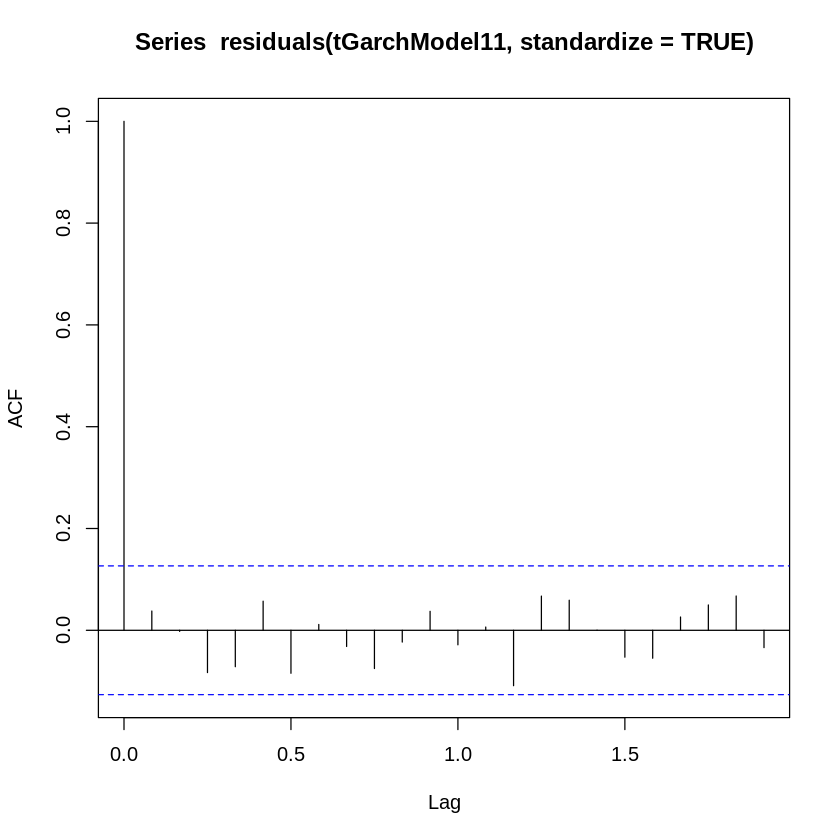

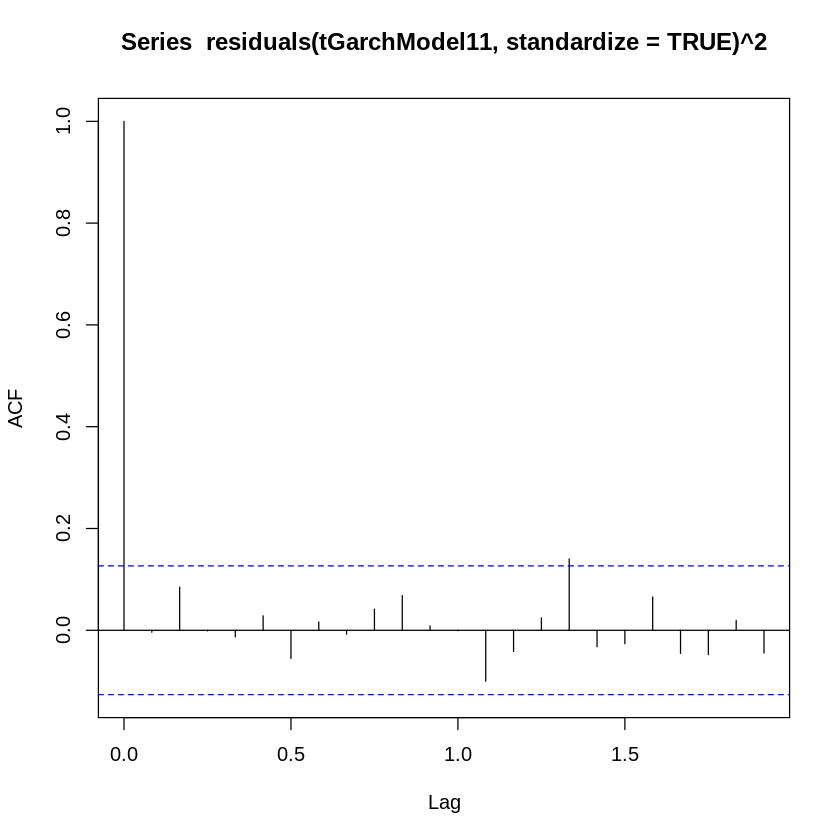

In [ ]:
vol_tgarch11 <- ts(tGarchModel11@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_tgarch11, xlab="", ylab="")

acf(residuals(tGarchModel11, standardize = TRUE))
acf(residuals(tGarchModel11, standardize = TRUE)^2)


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: fGARCH
fGARCH Sub-Model: TGARCH

Horizon: 12
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=Jan 2024]:
       Series   Sigma
T+1  0.012556 0.07359
T+2  0.008821 0.08256
T+3  0.008058 0.08587
T+4  0.007901 0.08710
T+5  0.007869 0.08755
T+6  0.007863 0.08772
T+7  0.007861 0.08778
T+8  0.007861 0.08780
T+9  0.007861 0.08781
T+10 0.007861 0.08781
T+11 0.007861 0.08781
T+12 0.007861 0.08782



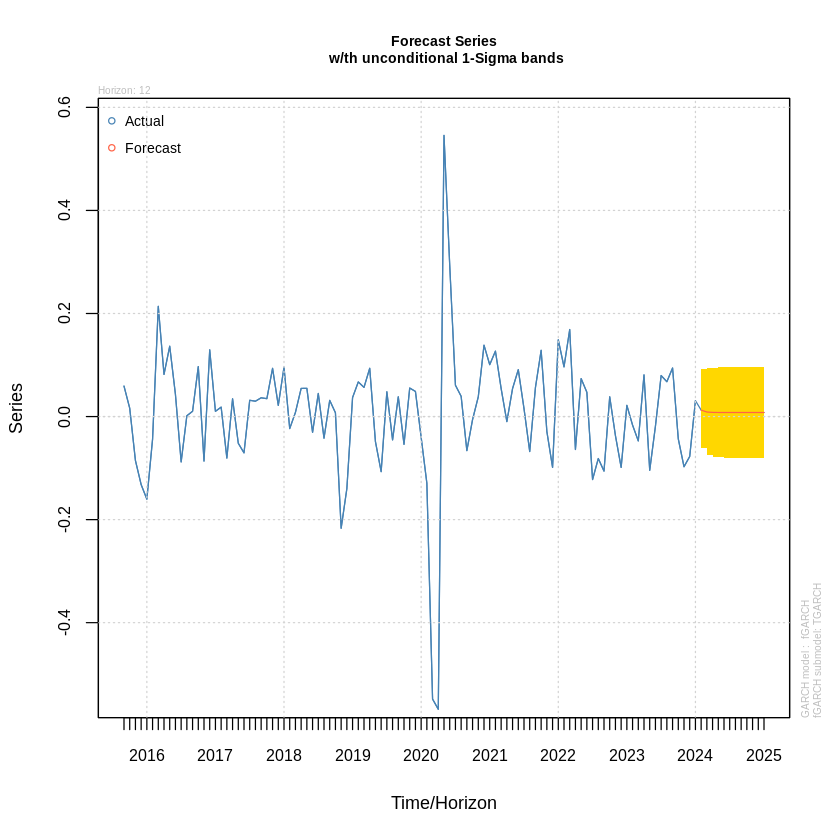

In [ ]:
forec <- ugarchforecast(tGarchModel11, data = dl_data, n.ahead = 12)
forec
plot(forec, which=1)
